In [13]:
#Importamos todas las librerias
from random import choice #Para escoger palabras random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output #Para borrar el output
import unidecode #Para quitar acentos
import pandas as pd

#Importamos listas  de palabras 
listas=pd.read_excel('listas.xlsx')
lista_animales=list(listas['animal'].dropna())
lista_paises=list(listas['paises'].dropna())
lista_disney=list(listas['peliculas'].dropna())

In [14]:
def normalize (texto):
    
    texto=(unidecode.unidecode(texto.lower()))
    
    return texto

In [15]:
#La funcion inicio da la bienvenida y te pide seleccionar el nivel, al finalizar regresa el nivel elegido
def inicio ():
    
    print("Bienvenido Ironhack-ado \n El juego consta de tres niveles Basico - Intermedio - Avanzado:\n - Básico consta de palabras cortas y 6 intentos \n - Intermedio consta de palabras largas y 6 intentos \n - Avanzado consta de palabras largas y 4 intentos")
    nivel= normalize(input("Escoge tu nivel: "))
                     
    while nivel not in ["basico", "intermedio", "avanzado"]:
        nivel=normalize(input("Nivel invalido por favor escoge tu nivel: "))
    
    return nivel #Regresa

In [16]:
def categoria ():
    
    cat=normalize(input("Elige una categoria entre animales,paises o peliculas de disney: "))
    
    while cat not in ["animales","paises","peliculas de disney"]:        
        cat=normalize(input("Categoria invalida escoge un entre animales, paises o peliculas de disney "))

    return cat

In [17]:
def lista (nivel,cat):
    
    if cat=="animales":
        palabra=choice(lista_animales)
        
    elif cat=="paises":
        palabra=choice(lista_paises)
        
    elif cat=="peliculas de disney":
        palabra=choice(lista_disney)
        
    return palabra      

In [18]:
def palabra_nivel(nivel,palabra,cat):
    
    if nivel=='basico':        
        while len(palabra)  >= 7:
            palabra=lista(nivel,cat)
            
    else:
        while len(palabra)  < 7:
            palabra=lista(nivel,cat) 
            
    return (palabra)

In [19]:
def error_drawing(num,nivel):
    if nivel == 'avanzado':
        plt.imshow(mpimg.imread(str(num)+'.a.jpg'))
        plt.axis('off')
    else:
        plt.imshow(mpimg.imread(str(num)+'.jpg'))
        plt.axis('off')
    return(plt.show())

In [20]:
def game_play(word,nivel):
    score=0
    used=[]
    error_drawing(str(score),nivel)
    
    display=['_' if letra != ' ' else '   ' for letra in word]
    print(' '.join(display))
    
    if nivel == 'avanzado':
        dificultad=4
    else:
        dificultad=6
    
    while (score < dificultad) and ('_' in display):
        if len(used) > 0:
            print('Has usado estas letras:\n')
            print(used)
        x=normalize(input('Dame una letra'))
        while x in used:
                    x=normalize(input('Ya usaste esa letra elige otra letra'))
        used.append(x)
        if x in word:
            for i, letra in enumerate(word):
                if x == letra:
                    clear_output(wait=True)
                    display[i]=x
                    error_drawing((score),nivel)        
        elif x not in word:
            clear_output(wait=True)
            score+=1        
            error_drawing(str(score),nivel)
        print(' '.join(display))
    
    if score == dificultad:
        clear_output(wait=True)
        error_drawing(str(score),nivel)
        print('La palabra correcta era '+word)
        print('Perdiste')
    
    elif '_' not in display:
        clear_output(wait=True)
        error_drawing(str(score),nivel)
        print('La palabra correcta es "'+''.join(display)+'"')
        print ('Ganaste!!')

In [21]:
def flow():
    nivel=inicio()
    cat=categoria()
    palabra=lista(nivel,cat)
    palabra=palabra_nivel(nivel,palabra,cat)
    game_play(palabra,nivel)

In [22]:
def juego():
    jugar='si'
    while jugar == 'si':
        flow()
        jugar=normalize(input('Quieres volver a jugar? si/no'))
        clear_output(wait=True)
    print("Esperamos verte pronto")
    plt.imshow(mpimg.imread('bye.jpg'))    
    plt.axis('off')

Esperamos verte pronto


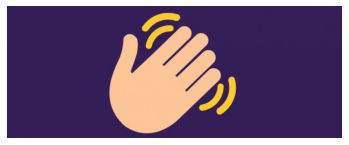

In [24]:
juego()